# Importing the data using Pandas

In [3]:
import pandas as pd

def read_parquet_file(file_path):
    try:
        # Read the parquet file into a DataFrame
        df = pd.read_parquet(file_path)
        return df
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Specify the file path
data_directory = '../data'
file_name = 'yellow_tripdata_2024-01.parquet'  # Replace with your actual file name if different
file_path = f"{data_directory}/{file_name}"

# Read the parquet file
data = read_parquet_file(file_path)

if data is not None:
    # Print the first few rows of the DataFrame to verify
    print(data.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72         1.0                  N           186            79   
1           1.80         1.0                  N           140           236   
2           4.70         1.0                  N           236            79   
3           1.40         1.0                  N            79           211   
4           0.80         1.0                  N           211           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


# Data cleaning
Before we can begin with the analysis, we clean the data by getting rid of null and duplicate values. Before doing that, we will plot a correlation map in order to look at important parameters in our dataset. We start by prompting `deepseek` to create a correlation map.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded from a CSV or other source
# For example, if you have a CSV file named 'data.csv':
# data = pd.read_csv('data.csv')

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title and labels
plt.title('Correlation Map')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

ValueError: could not convert string to float: 'N'

Giving the error as input to `deepseek`. It correctly identifes that non-numeric values cannot be used here:
```
The error you're encountering is due to the presence of non-numeric data in your DataFrame, which pandas cannot handle when computing correlations directly from the DataFrame without conversion to numeric types. To resolve this issue, you need to ensure that all columns involved are numeric. If any column contains non-numeric data (like strings), it will cause a ValueError.
```

The correct code is then given:

Index(['store_and_fwd_flag'], dtype='object')


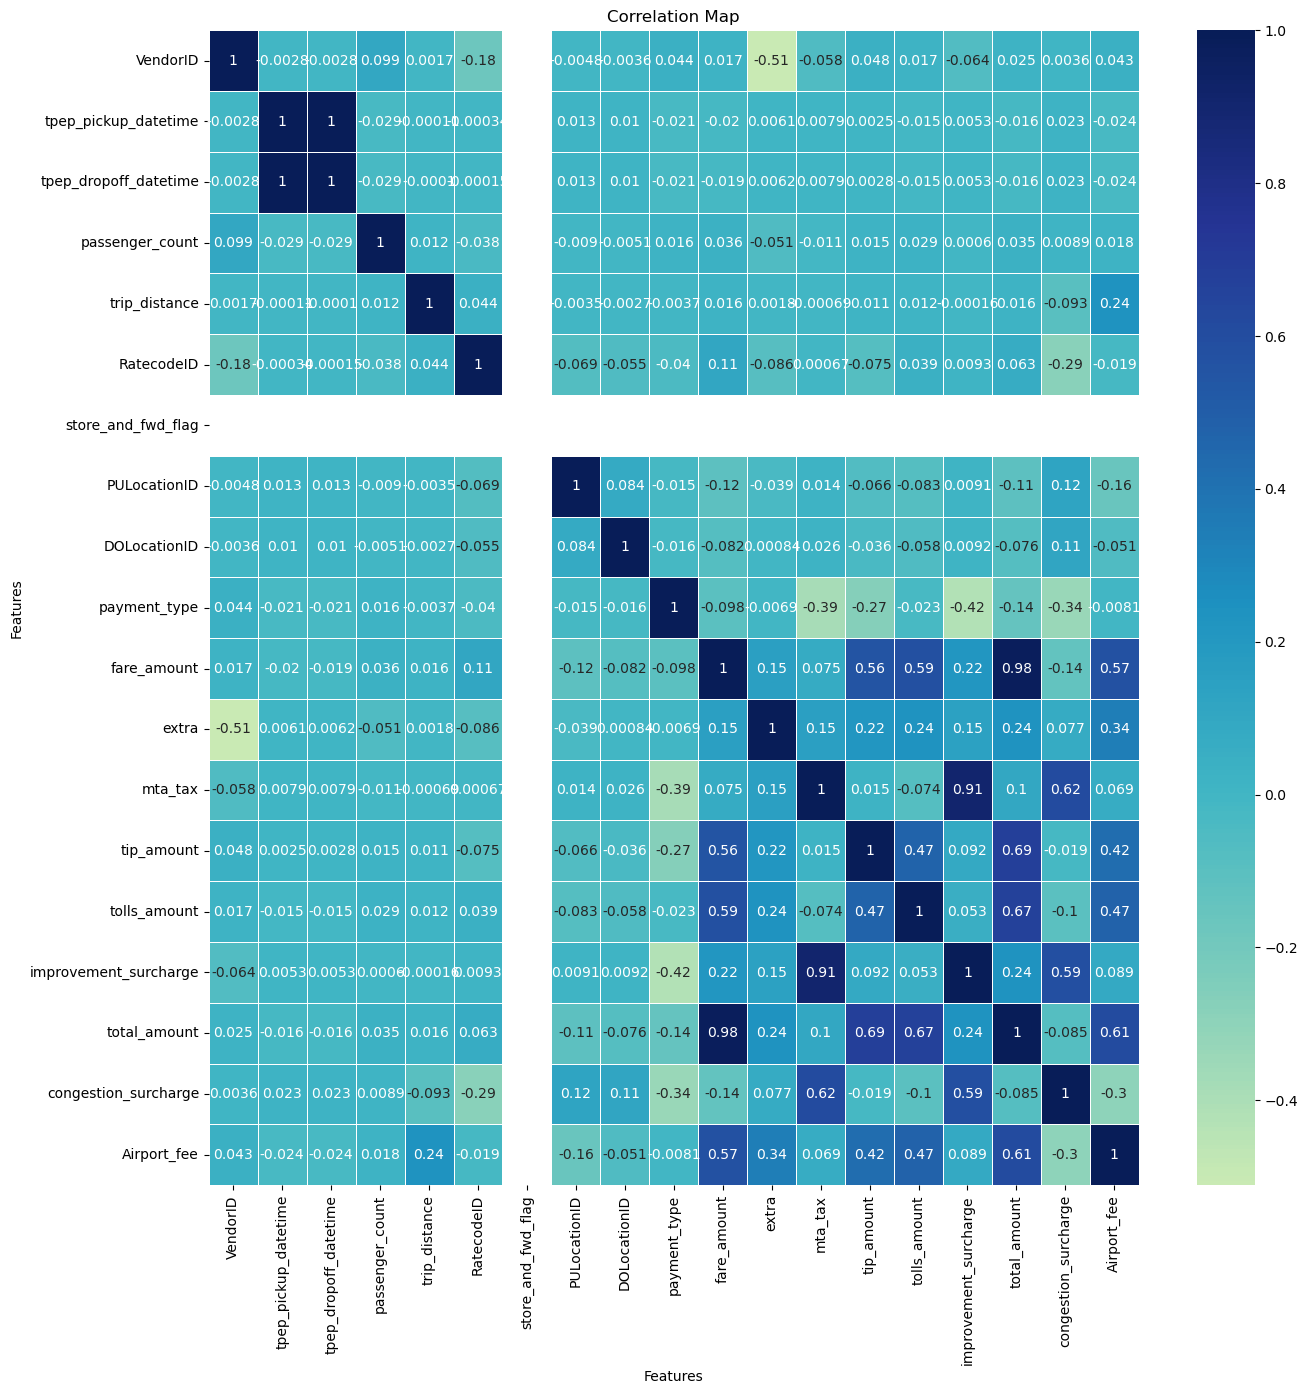

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded from a CSV or other source
# For example, if you have a CSV file named 'data.csv':
# data = pd.read_csv('data.csv')

# Check for non-numeric columns and decide what to do with them
non_numeric_columns = data.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print("Warning: The following columns are not numeric and will be dropped from the correlation computation:")
    print(non_numeric_columns)
    # Optionally, convert non-numeric columns to numeric. For example:
    for col in non_numeric_columns:
        if data[col].dtype == 'object':  # Assuming strings are objects
            try:
                data[col] = pd.to_numeric(data[col], errors='coerce')
            except ValueError as e:
                print(f"Error converting column {col}: {e}")
                continue

# Compute the correlation matrix after ensuring all columns are numeric
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Plot the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0, linewidths=0.5) # I added linewidths and changed cmap style

# Add title and labels
plt.title('Correlation Map')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

From the above plot, we notice that there are some paramters that do not have provide any additional information, like `VendorID` and as correctly identified before by `deepseek`, `store_and_fwd_flag`. We will drop these for now, moving forward. 

In [6]:
# Drop the columns 'VendorID' and 'store_and_fwd_flag'
data = data.drop(columns=['VendorID', 'store_and_fwd_flag'])
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


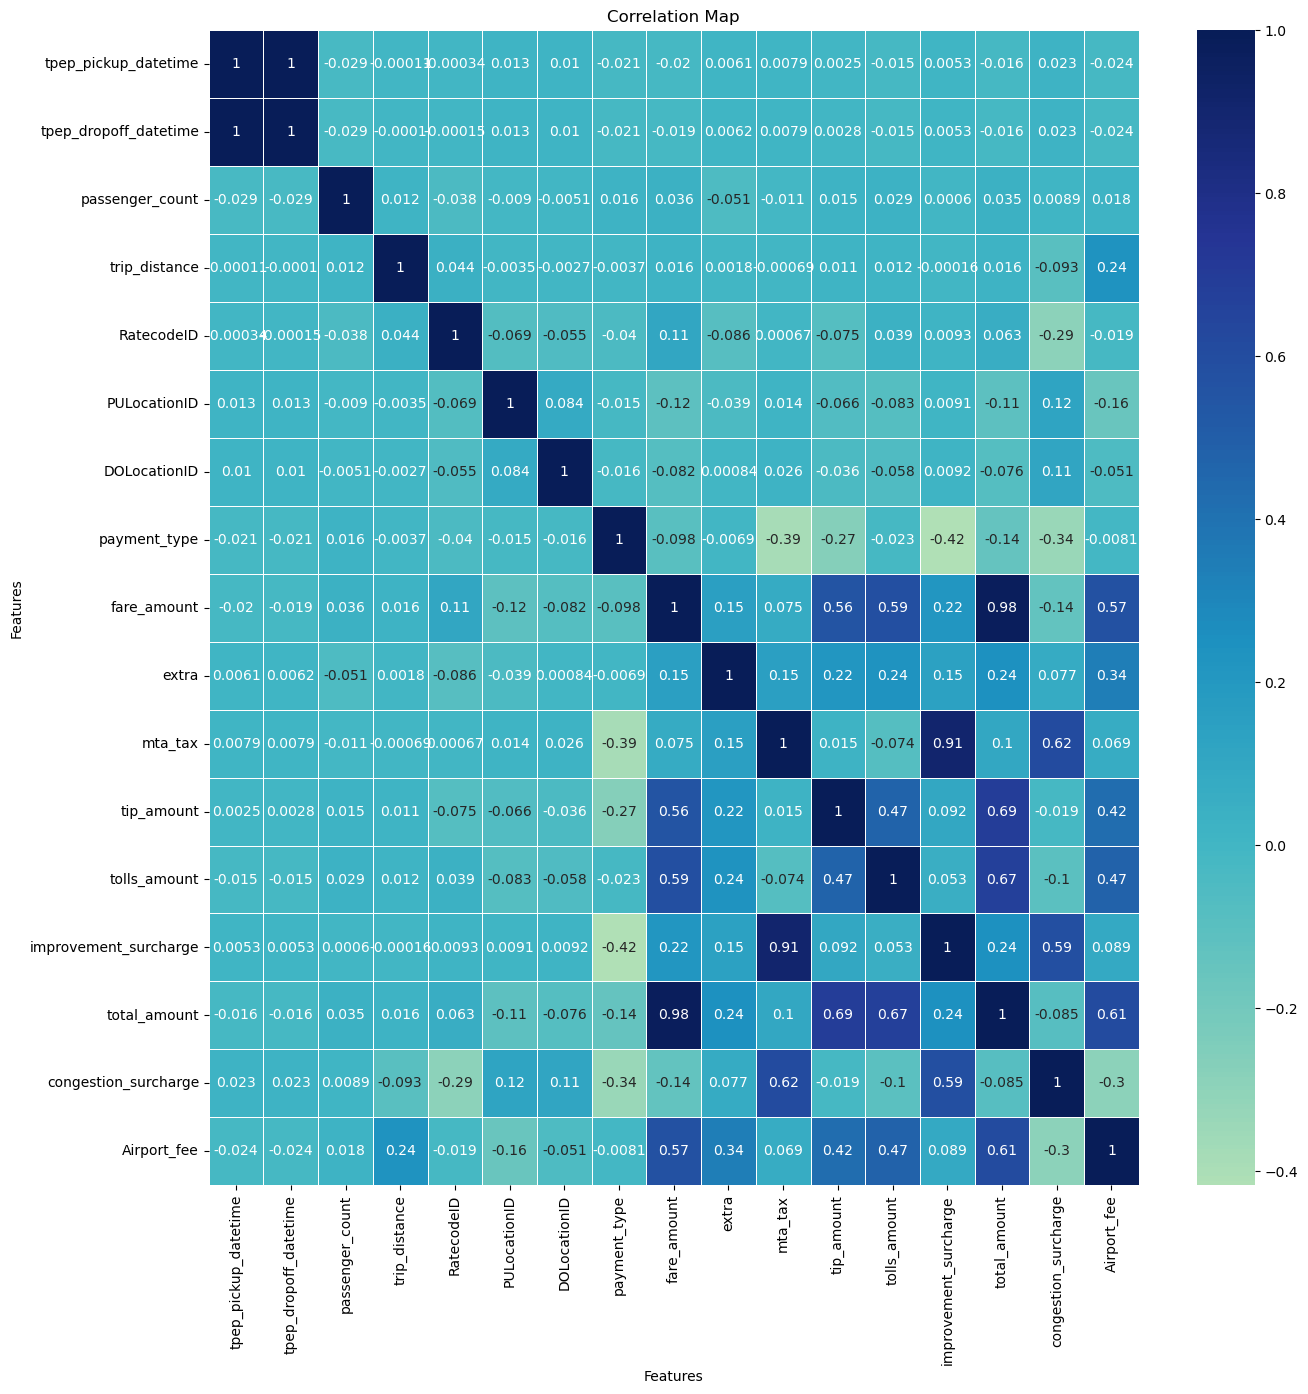

In [7]:
# Compute the correlation matrix after ensuring all columns are numeric
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Plot the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0, linewidths=0.5) #added linewidths and changed cmap style

# Add title and labels
plt.title('Correlation Map')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

## Cleaning
We will clean the data by removing null values and duplicates now

In [8]:
# Remove duplicates and store the result in tdata
tdata = data.drop_duplicates()

# Calculate the number of rows deleted
rows_deleted = len(data) - len(tdata)

print(f"Number of duplicate rows removed: {rows_deleted}")

# Compare the size of tdata to data based on the no. of rows
original_size = len(data)
duplicated_size = len(tdata)
reduction = (1 - duplicated_size / original_size) * 100

print(f"Original DataFrame size in terms of rows: {original_size}")
print(f"Duplicated DataFrame size in terms of rows: {duplicated_size}")
print(f"Reduction in the number of rows: {reduction:.2f}%")

Number of duplicate rows removed: 0
Original DataFrame size in terms of rows: 2964624
Duplicated DataFrame size in terms of rows: 2964624
Reduction in the number of rows: 0.00%


In [9]:
# Check for missing values in the DataFrame
missing_values = tdata.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64


In [10]:
# Check for zero values in the DataFrame
zero_values = (tdata == 0).sum()
print("Zero values per column:")
print(zero_values)

Zero values per column:
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            31465
trip_distance              60371
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
payment_type              140162
fare_amount                  893
extra                    1290548
mta_tax                    29707
tip_amount                710292
tolls_amount             2753809
improvement_surcharge        838
total_amount                 416
congestion_surcharge      217877
Airport_fee              2586789
dtype: int64


The columns with zeroes which are an issue are `passenger_count`, `trip_distance` and `total_amount`. The lack of passenger counts isn't a big issue per se, but it will hinder with the final results of our analysis, therefore we will drop it. 

In [11]:
# Assuming tdata is your DataFrame
tdata.drop((tdata[(tdata['passenger_count'] == 0) | (tdata['trip_distance'] == 0) | (tdata['total_amount'] == 0)]).index, inplace=True)

In [12]:
# Check for zero values in the DataFrame
zero_values = (tdata == 0).sum()
print("Zero values per column:")
print(zero_values)

Zero values per column:
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
payment_type              117331
fare_amount                  330
extra                    1242819
mta_tax                    19076
tip_amount                658020
tolls_amount             2667286
improvement_surcharge         86
total_amount                   0
congestion_surcharge      197845
Airport_fee              2523861
dtype: int64


In [13]:
# Calculate the number of rows deleted
rows_deleted = len(data) - len(tdata)

print(f"Number of duplicate rows removed: {rows_deleted}")

# Compare the size of tdata to data based on the no. of rows
original_size = len(data)
duplicated_size = len(tdata)
reduction = (1 - duplicated_size / original_size) * 100

print(f"Original DataFrame size in terms of rows: {original_size}")
print(f"Duplicated DataFrame size in terms of rows: {duplicated_size}")
print(f"Reduction in the number of rows: {reduction:.2f}%")

Number of duplicate rows removed: 91177
Original DataFrame size in terms of rows: 2964624
Duplicated DataFrame size in terms of rows: 2873447
Reduction in the number of rows: 3.08%


In [14]:
tdata['tpep_pickup_datetime'] = pd.to_datetime(tdata['tpep_pickup_datetime'])
tdata['tpep_dropoff_datetime'] = pd.to_datetime(tdata['tpep_dropoff_datetime'])

In [16]:
# Making these variables easily accessible
tdata['pickup_year'] = pd.to_datetime(tdata['tpep_pickup_datetime']).dt.year
tdata['pickup_month'] = pd.to_datetime(tdata['tpep_pickup_datetime']).dt.month
tdata['pickup_day'] = pd.to_datetime(tdata['tpep_pickup_datetime']).dt.day
tdata['pickup_weekday'] = pd.to_datetime(tdata['tpep_pickup_datetime']).dt.weekday
tdata['pickup_hour'] = pd.to_datetime(tdata['tpep_pickup_datetime']).dt.hour

tdata['dropoff_year'] = pd.to_datetime(tdata['tpep_dropoff_datetime']).dt.year
tdata['dropoff_month'] = pd.to_datetime(tdata['tpep_dropoff_datetime']).dt.month
tdata['dropoff_day'] = pd.to_datetime(tdata['tpep_dropoff_datetime']).dt.day
tdata['dropoff_weekday'] = pd.to_datetime(tdata['tpep_dropoff_datetime']).dt.weekday
tdata['dropoff_hour'] = pd.to_datetime(tdata['tpep_dropoff_datetime']).dt.hour

In [17]:
year_counts = tdata['pickup_year'].value_counts().sort_index()
print(year_counts)

pickup_year
2002          2
2009          3
2023         10
2024    2873432
Name: count, dtype: int64


As we can see above, most of the entires are present in the year 2024 in this dataset, so we will drop the rest of the years.

In [18]:
tdata = tdata[(tdata['pickup_year'] == 2024) | (tdata['dropoff_year'] == 2024)]

In [19]:
year_counts = tdata['pickup_year'].value_counts().sort_index()
print(year_counts)

pickup_year
2023          7
2024    2873432
Name: count, dtype: int64


From this we see that there were 7 rides which started in 2023 and ended after the new year. They were definitely late for the celebration. 
We don't need that data as well, so we will drop it completely. 

In [20]:
tdata = tdata[(tdata['pickup_year'] == 2024) & (tdata['dropoff_year'] == 2024)]

In [21]:
year_counts = tdata['pickup_year'].value_counts().sort_index()
print(year_counts)

pickup_year
2024    2873432
Name: count, dtype: int64


Next, we need to look at the trip duration of each ride, a parameter not present in the dataset. 

In [22]:
# Convert to datetime
tdata['tpep_pickup_datetime'] = pd.to_datetime(tdata['tpep_pickup_datetime'])
tdata['tpep_dropoff_datetime'] = pd.to_datetime(tdata['tpep_dropoff_datetime'])

# Compute the trip duration in hours
tdata['trip_duration_hours'] = (tdata['tpep_dropoff_datetime'] - tdata['tpep_pickup_datetime']).dt.total_seconds() / 3600

tdata.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_month,pickup_day,pickup_weekday,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_weekday,dropoff_hour,trip_duration_hours
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,17.7,1.0,...,1,1,0,0,2024,1,1,0,1,0.330000
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,10.0,3.5,...,1,1,0,0,2024,1,1,0,0,0.110000
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,23.3,3.5,...,1,1,0,0,2024,1,1,0,0,0.298611
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,10.0,3.5,...,1,1,0,0,2024,1,1,0,0,0.138333
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,7.9,3.5,...,1,1,0,0,2024,1,1,0,0,0.101667


In [23]:
original_len = len(tdata)

# Filter out rows where trip_duration_hours is zero
tdata = tdata[tdata['trip_duration_hours'] != 0]

# Check the number of dropped rows
dropped_rows = original_len - len(tdata) 
print(f"Number of rows dropped: {dropped_rows}")

Number of rows dropped: 53


53 entries were dropped.

In [24]:
tdata.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_month,pickup_day,pickup_weekday,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_weekday,dropoff_hour,trip_duration_hours
count,2873379,2873379,2.756054e+06,2.873379e+06,2.756054e+06,2.873379e+06,2.873379e+06,2.873379e+06,2.873379e+06,2.873379e+06,...,2.873379e+06,2.873379e+06,2.873379e+06,2.873379e+06,2873379.0,2.873379e+06,2.873379e+06,2.873379e+06,2.873379e+06,2.873379e+06
mean,2024-01-17 01:23:22.167769,2024-01-17 01:39:07.004976,1.354464e+00,3.737875e+00,2.024716e+00,1.661477e+02,1.652127e+02,1.161689e+00,1.807717e+01,1.451738e+00,...,1.000001e+00,1.644490e+01,2.872452e+00,1.420986e+01,2024.0,1.000206e+00,1.644674e+01,2.875446e+00,1.427523e+01,2.624548e-01
min,2024-01-01 00:00:00,2024-01-01 00:02:42,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.990000e+02,-7.500000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2024.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.261111e-01
25%,2024-01-09 16:10:11.500000,2024-01-09 16:27:37.500000,1.000000e+00,1.020000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,...,1.000000e+00,9.000000e+00,1.000000e+00,1.100000e+01,2024.0,1.000000e+00,9.000000e+00,1.000000e+00,1.100000e+01,1.208333e-01
50%,2024-01-17 10:59:31,2024-01-17 11:18:15,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,...,1.000000e+00,1.700000e+01,3.000000e+00,1.500000e+01,2024.0,1.000000e+00,1.700000e+01,3.000000e+00,1.500000e+01,1.952778e-01
75%,2024-01-24 18:35:04,2024-01-24 18:50:58,1.000000e+00,3.190000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,...,1.000000e+00,2.400000e+01,5.000000e+00,1.900000e+01,2024.0,1.000000e+00,2.400000e+01,5.000000e+00,1.900000e+01,3.127778e-01
max,2024-02-01 00:01:15,2024-02-01 22:04:34,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.221300e+03,1.425000e+01,...,2.000000e+00,3.100000e+01,6.000000e+00,2.300000e+01,2024.0,2.000000e+00,3.100000e+01,6.000000e+00,2.300000e+01,1.575900e+02
std,NaN,NaN,8.434530e-01,2.290134e+02,9.676034e+00,6.348869e+01,6.926955e+01,5.622071e-01,1.784800e+01,1.799259e+00,...,1.021796e-03,8.824820e+00,1.934595e+00,5.701499e+00,0.0,1.436436e-02,8.825488e+00,1.936876e+00,5.789959e+00,5.850347e-01


In [25]:
top_50_trip_distances = tdata.sort_values(by='trip_distance', ascending=False).head(50)

# Print the top 50 entries
print(top_50_trip_distances)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2958079  2024-01-30 06:37:00   2024-01-30 06:50:00              NaN   
2934895  2024-01-25 08:39:00   2024-01-25 09:06:00              NaN   
2911232  2024-01-20 08:01:00   2024-01-20 08:26:00              NaN   
2920143  2024-01-21 11:58:00   2024-01-21 12:12:00              NaN   
2891991  2024-01-17 08:41:00   2024-01-17 09:23:00              NaN   
2843369  2024-01-05 15:46:00   2024-01-05 16:17:00              NaN   
2854947  2024-01-09 07:13:00   2024-01-09 07:17:00              NaN   
2931119  2024-01-24 12:26:00   2024-01-24 12:42:00              NaN   
2868605  2024-01-12 05:16:00   2024-01-12 05:26:00              NaN   
2869099  2024-01-12 07:18:00   2024-01-12 07:38:00              NaN   
2875656  2024-01-13 14:00:00   2024-01-13 14:13:00              NaN   
2919753  2024-01-21 07:02:00   2024-01-21 07:22:00              NaN   
2875730  2024-01-13 15:50:00   2024-01-13 16:05:00              NaN   
288792

In [26]:
# Filter out trips with trip_distance above 50 miles in tdata
tdata = tdata[tdata['trip_distance'] <= 50]

# Display the modified DataFrame
print(tdata.sort_values(by='trip_distance', ascending=False).head(50))

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2403153  2024-01-27 14:33:23   2024-01-27 15:43:40              1.0   
1671581  2024-01-19 20:02:22   2024-01-19 21:07:28              2.0   
2251576  2024-01-25 23:07:07   2024-01-26 00:04:02              1.0   
1642919  2024-01-19 15:41:10   2024-01-19 16:44:07              1.0   
1050191  2024-01-13 04:47:10   2024-01-13 05:49:44              1.0   
27708    2024-01-01 09:31:30   2024-01-01 10:26:07              1.0   
2864677  2024-01-10 20:33:34   2024-01-10 21:52:55              NaN   
1012747  2024-01-12 19:57:30   2024-01-12 21:02:11              1.0   
1913180  2024-01-22 15:30:40   2024-01-22 17:17:23              1.0   
1916250  2024-01-22 16:27:44   2024-01-22 18:05:33              4.0   
27745    2024-01-01 09:55:46   2024-01-01 10:51:12              1.0   
438466   2024-01-06 08:41:47   2024-01-06 09:35:33              1.0   
118757   2024-01-02 17:10:04   2024-01-02 18:31:53              1.0   
153261

In [28]:
# Filter for entries with negative fare_amount and sort in descending order
negative_fare_values = tdata[tdata['fare_amount'] < 0].sort_values(by='fare_amount', ascending=True)

# Display the entries with negative fare amounts
print(negative_fare_values)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
541145   2024-01-07 12:38:39   2024-01-07 12:38:59              4.0   
2610968  2024-01-29 19:19:21   2024-01-29 19:24:05              1.0   
1518331  2024-01-18 11:30:18   2024-01-18 11:30:26              4.0   
865157   2024-01-11 11:44:34   2024-01-11 12:16:56              2.0   
107288   2024-01-02 15:02:50   2024-01-02 15:04:30              3.0   
...                      ...                   ...              ...   
2936700  2024-01-25 17:51:14   2024-01-25 18:13:08              NaN   
2884131  2024-01-15 14:33:45   2024-01-15 14:52:42              NaN   
2844247  2024-01-05 19:10:35   2024-01-05 19:35:09              NaN   
2862649  2024-01-10 07:56:24   2024-01-10 08:21:05              NaN   
2909392  2024-01-20 00:23:59   2024-01-20 00:47:00              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
541145            0.11         5.0           246           246     

In [29]:
# Remove entries with negative fare_amount
tdata = tdata[tdata['fare_amount'] >= 0]

# Display the modified DataFrame
print(tdata[tdata['fare_amount'] < 0].sort_values(by='fare_amount', ascending=True))

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, pickup_year, pickup_month, pickup_day, pickup_weekday, pickup_hour, dropoff_year, dropoff_month, dropoff_day, dropoff_weekday, dropoff_hour, trip_duration_hours]
Index: []

[0 rows x 28 columns]


In [30]:
# Export to CSV
output_file_path = '../data/cleaned_data.csv'  # Specify the path where you want to save the file
tdata.to_csv(output_file_path, index=False)  # Save without including row indices

In [31]:
import geopandas as gpd

# Path to your .shp file
shp_file_path = '../data/taxi_zones/taxi_zones.shp'

# Read the shapefile
zone_shp = gpd.read_file(shp_file_path)

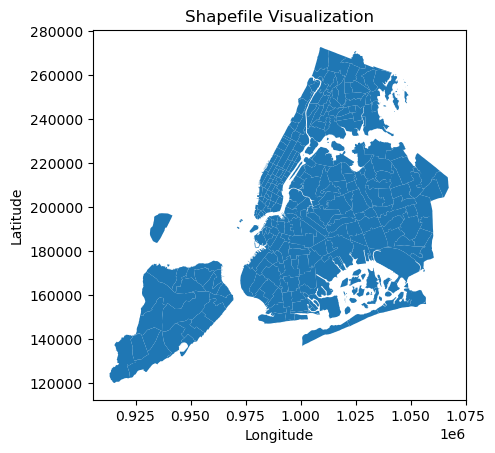

In [32]:
# Plot the shapefile data
zone_shp.plot()
plt.title('Shapefile Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()